In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fgonz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fgonz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df1 = pd.read_csv('Email spam.csv')
df2 = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [3]:
df1.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df2.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df2["text"]=df2["Message"]

In [6]:
df2['spam'] = df2['Category'].replace({'ham': 0, 'spam': 1})


In [7]:
df2

,Category,Message,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...","Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like i'd...,0


In [8]:
df2=df2.drop(labels=["Category", "Message"], axis=1)

In [9]:
df = pd.concat([df1, df2], axis=0)

In [10]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [11]:
print(df['spam'].value_counts())

0    9185
1    2115
Name: spam, dtype: int64


In [12]:
print(df.isnull().sum())

text    0
spam    0
dtype: int64


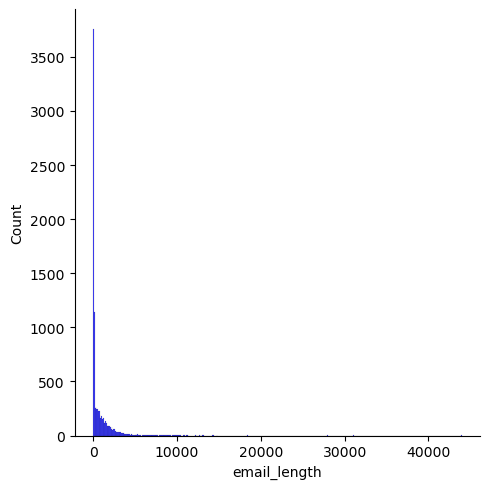

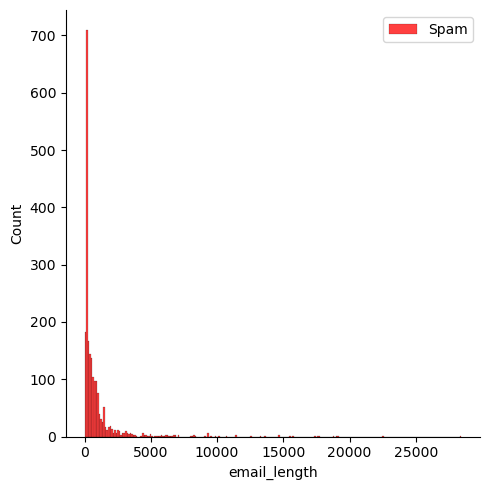

In [13]:
df['email_length'] = df['text'].apply(len)
sns.displot(df[df['spam']==0]['email_length'], kde=False, color='blue', label='Not Spam')
sns.displot(df[df['spam']==1]['email_length'], kde=False, color='red', label='Spam')
plt.legend()
plt.show()

In [14]:
stop_words = set(stopwords.words('english'))
def preprocess_email(email):
    email = email.lower()
    email = word_tokenize(email)
    email = [word for word in email if word.isalpha() and word not in stop_words]
    return ' '.join(email)


In [15]:
df['text_prepr'] = df['text'].apply(preprocess_email)

In [16]:
df

,text,spam,email_length,text_prepr
0,Subject: naturally irresistible your corporate...,1,1484,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,500,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,235,subject money get software cds software compat...
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,160,time tried contact u pound prize claim easy ca...
5568,Will ü b going to esplanade fr home?,0,36,ü b going esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",0,57,pity mood suggestions
5570,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like interested buying some...


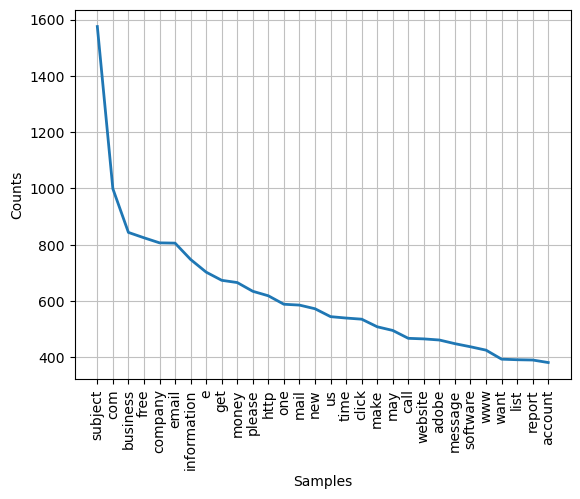

In [17]:
spam_words = ' '.join(df[df['spam']==1]['text_prepr'])
spam_words = nltk.word_tokenize(spam_words)
fdist = FreqDist(spam_words)
fdist.plot(30, cumulative=False)
plt.show()

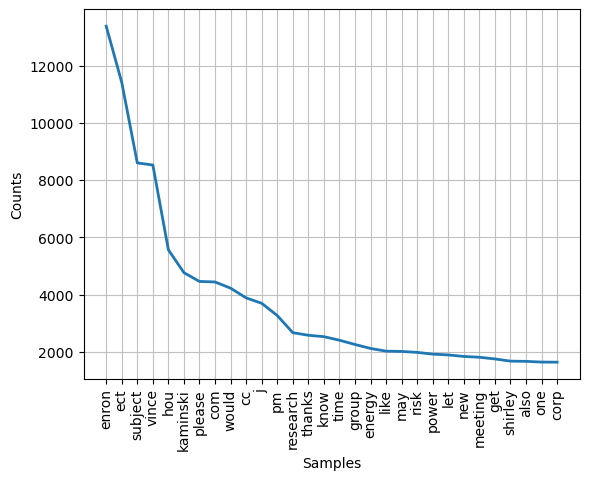

In [18]:
not_spam_words = ' '.join(df[df['spam']==0]['text_prepr'])
not_spam_words = nltk.word_tokenize(not_spam_words)
fdist = FreqDist(not_spam_words)
fdist.plot(30, cumulative=False)
plt.show()

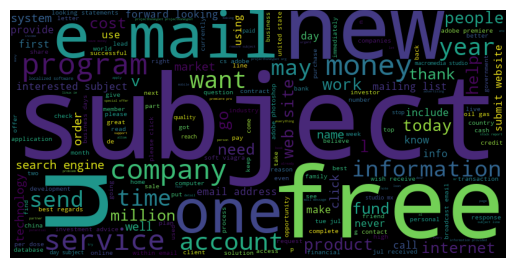

In [20]:
spam_words = ' '.join(df[df['spam']==1]['text_prepr'])
wordcloud = WordCloud(width=800, height=400).generate(spam_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

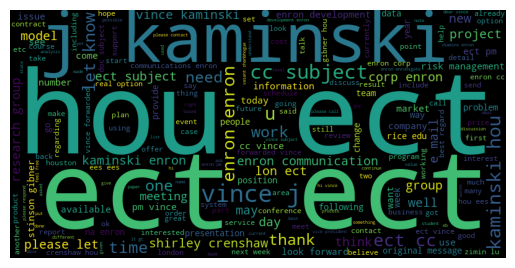

In [21]:
spam_words = ' '.join(df[df['spam']==0]['text_prepr'])
wordcloud = WordCloud(width=800, height=400).generate(spam_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('processed_emails.csv', index=False)